<a href="https://colab.research.google.com/github/junggangwo/pdm07/blob/main/%20%ED%8C%8C%EC%9D%B4%20%ED%8C%AC%EB%8D%94/pandas_5_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Pima-Indians-Diabetes-Data** 

> https://medium.com/@soumen.atta/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb

In [1]:
# Load the required packages 
import numpy as np 
import pandas as pd 
from pandas import read_csv
import matplotlib.pyplot as plt

**Load CSV file using Pandas**

In [2]:
# Specify the file name 
url = "https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/diabetes.csv"
filename = url
# filename = 'diabetes.csv'  # access to local file

# Read the data 
data = read_csv(filename) 

# Print the shape 
type(data), data.shape

(pandas.core.frame.DataFrame, (768, 9))

In [3]:
# Print the first 5 rows 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> https://medium.com/@soumen.atta/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb

In [4]:
# Show the type of 'data'
type(data) 

pandas.core.frame.DataFrame

In [5]:
# Get the column names 
col_idx = data.columns
col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Get row indices 
row_idx = data.index
print(row_idx)

RangeIndex(start=0, stop=768, step=1)


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# Find data type for each attribute 
print("Data type of each attribute:")
data.dtypes

Data type of each attribute:


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Check data
- null
- NaN

In [10]:
# Check NaN
#data.isna().sum()
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Descriptive Statistics using Pandas**  

The *describe()* function on the Pandas DataFrame lists 8 statistical properties of each attribute. They are:

Count,
Mean,
Standard Deviation,
Minimum Value,
25th Percentile,
50th Percentile (Median),
75th Percentile,
Maximum Value. 

In [11]:
# Generate statistical summary 
description = data.describe()
print("Statistical summary of the data:\n")
description

Statistical summary of the data:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA (Exploratory Data Analysis)
- 탐색적 데이터 분석
- https://medium.com/mighty-data-science-bootcamp/eda-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%84%A4%EB%AA%85%EC%84%9C%EC%97%90%EC%84%9C-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0-230060b9fc17

**Distribution of the *Outcome* attribute**

The data considered here is an example of a classification data. We can get an idea of the distribution of the *Outcome* attribute in Pandas. 

In [12]:
class_counts = data.groupby('Outcome').size() 
print("Class breakdown of the data:\n")
print(class_counts)

Class breakdown of the data:

Outcome
0    500
1    268
dtype: int64


In [13]:
v,c=np.unique(data['Outcome'], return_counts=True)
v,c

(array([0, 1]), array([500, 268]))

Therefore, there are a total of 768 entries in the dataset. The outcome variable is set to 1 for 268 entries, and the rest are set to 0. 

**Correlation between all pairs of attributes:** 

We can use the *corr()* function on the Pandas DataFrame to calculate a correlation matrix. For calculating correlation, Pearson’s Correlation Coefficient is used here. *Pearson’s Correlation Coefficient* assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. On the other hand, a value of 0 shows no correlation at all. 

In [14]:
# Compute correlation matrix 
correlations = data.corr(method = 'pearson') 
print("Correlations of attributes in the data:\n") 
correlations

Correlations of attributes in the data:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
np.max(correlations),np.min(correlations)

(Pregnancies                 1.0
 Glucose                     1.0
 BloodPressure               1.0
 SkinThickness               1.0
 Insulin                     1.0
 BMI                         1.0
 DiabetesPedigreeFunction    1.0
 Age                         1.0
 Outcome                     1.0
 dtype: float64, Pregnancies                -0.081672
 Glucose                     0.057328
 BloodPressure               0.041265
 SkinThickness              -0.113970
 Insulin                    -0.073535
 BMI                         0.017683
 DiabetesPedigreeFunction   -0.033523
 Age                        -0.113970
 Outcome                     0.065068
 dtype: float64)

In [16]:
correlations.max(),correlations.min()

(Pregnancies                 1.0
 Glucose                     1.0
 BloodPressure               1.0
 SkinThickness               1.0
 Insulin                     1.0
 BMI                         1.0
 DiabetesPedigreeFunction    1.0
 Age                         1.0
 Outcome                     1.0
 dtype: float64, Pregnancies                -0.081672
 Glucose                     0.057328
 BloodPressure               0.041265
 SkinThickness              -0.113970
 Insulin                    -0.073535
 BMI                         0.017683
 DiabetesPedigreeFunction   -0.033523
 Age                        -0.113970
 Outcome                     0.065068
 dtype: float64)

In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

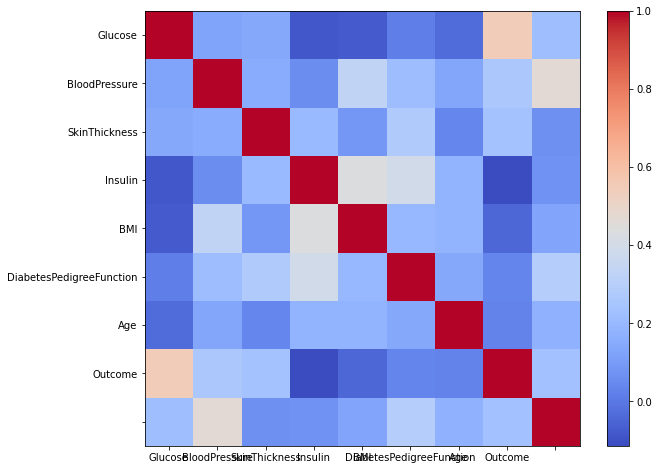

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
img = ax.imshow(correlations, cmap='coolwarm',interpolation='nearest')
ax.set_xticklabels(data.columns)
# plt.xticks(rotation=90)
ax.set_yticklabels(data.columns)
fig.colorbar(img)
plt.show()

**Skew of attribute distributions** 

The skew of each attribute can be calculated using the *skew()* function on the Pandas DataFrame. 

In [19]:
skew = data.skew() 
print("Skew of attribute distributions in the data:\n") 
skew

Skew of attribute distributions in the data:



Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

A positive value represents a right-skewed distribution, and a negative value denotes a left-skewed distribution. Values closer to zero correspond to less skewed distribution. 

# Visualizing data using Pandas

Now, we visualize data using Python's Pandas library. We discuss both univariate plots and multivariate plots using Pandas. 

**Univariate plots:** 

* Histograms.
* Density Plots.
* Box and Whisker Plots.  

**Histograms** 

The distribution of each attribute can easily be visualized by ploting histograms. 

In [20]:
type(data), data.shape

(pandas.core.frame.DataFrame, (768, 9))

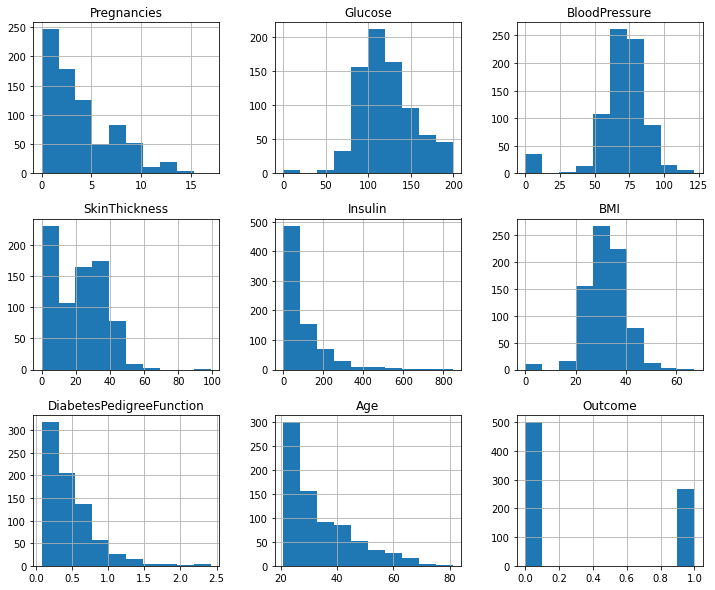

In [21]:
plt.rcParams['figure.figsize'] = [12, 10]; # set the figure size 

# Draw histograms for all attributes 
data.hist()
plt.show()

**Density Plots**

Another way to visualize the distribution of each attribute is density plots. 

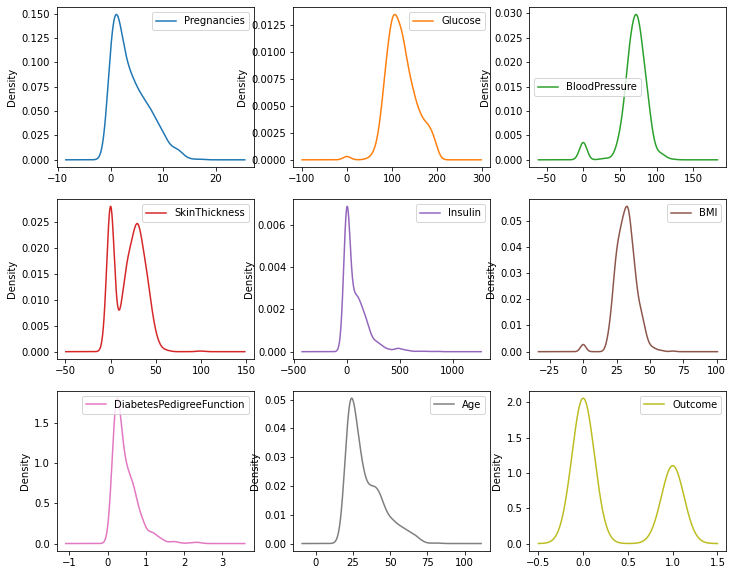

In [22]:
# Density plots for all attributes
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

**Box and Whisker Plots** 

Box and Whisker Plots (or simply, boxplots) is used to visualize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data, and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of the spread of the middle 50% of the data).

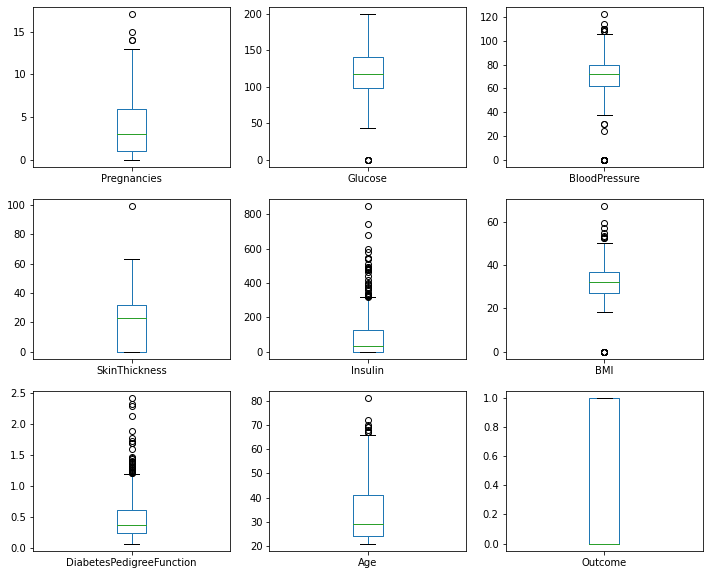

In [23]:
# Draw box and whisker plots for all attributes 
data.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

**Multivariate Plots:**

* Correlation Matrix Plot
* Scatter Plot Matrix 

**Correlation Matrix Plot**

We can use the *corr()* function on the Pandas DataFrame to calculate a correlation matrix. For calculating correlation, *Pearson’s Correlation Coefficient* is used here. Pearson’s Correlation Coefficient assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. On the other hand, a value of 0 shows no correlation at all.

In [24]:
# Compute the correlation matrix 
correlations = data.corr(method = 'pearson') # Correlations between all pairs of attributes
# Print the datatype 
type(correlations)
# Show the correlation matrix 
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


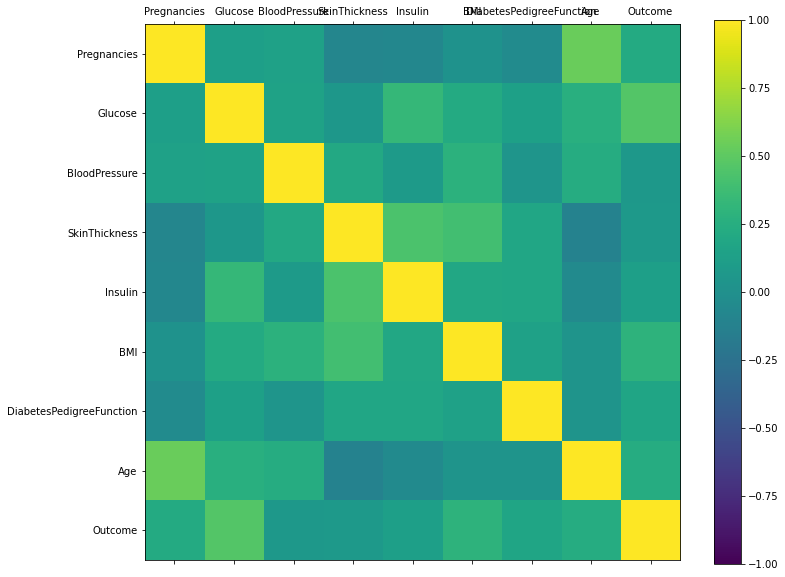

In [25]:
# import required package 
# import numpy as np 

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1) #, cmap='coolwarm' )
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = data.columns
ax.set_xticklabels(names)#,rotation=90) # Rotate x-tick labels by 90 degrees 
ax.set_yticklabels(names)
plt.show()

**Scatter Plot Matrix**

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables. Attributes with structured relationships may also be correlated, and good candidates for removal from your dataset.

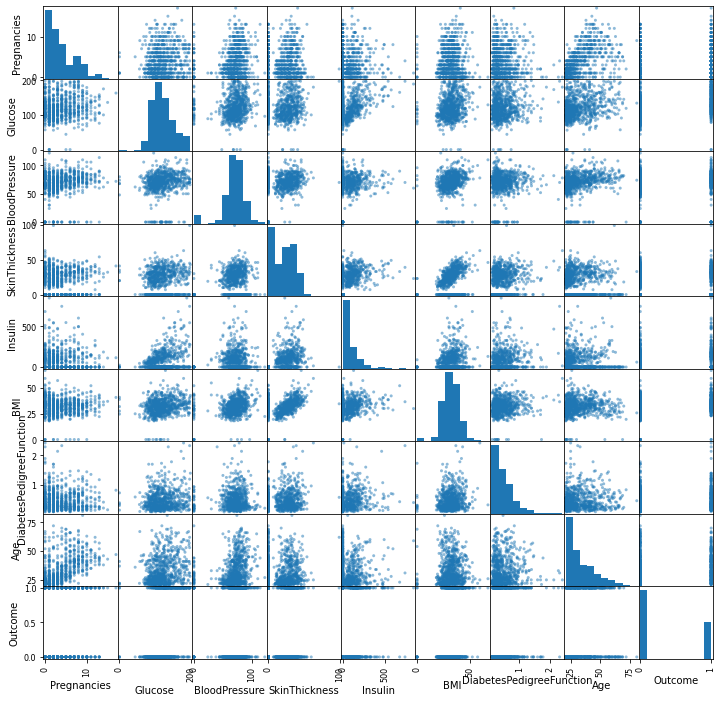

In [26]:
# Import required package 
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [12, 12]

# Plotting Scatterplot Matrix
scatter_matrix(data)
plt.show()

## seaborn
> Good visualization module

In [27]:
import seaborn as sns

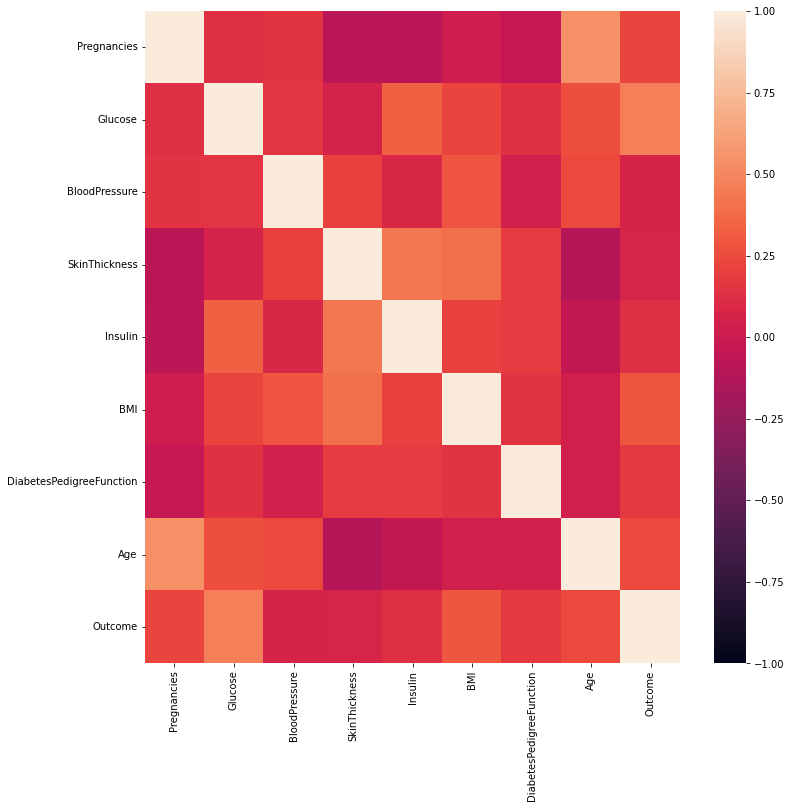

In [28]:
# Correlation plot
# plot the heatmap
# plt.plot(figsize=(10,10))
sns.heatmap(correlations, 
        xticklabels=data.columns,
        yticklabels=data.columns,
        vmin= -1, vmax=1.0)
plt.show()

In [ ]:
# Scatter plot
# import seaborn as sns
sns.pairplot(data)